# **Welcome to the Lungs Up Pneumonia Classifier!** 
This program can take in an annotated dataset and run the samples through a \
convolution neural network that classifies on the presence of fluid build-up (defined to be pneumonia). 

Below, please input the following parameters for this program:

*   **data_path**: The string of the file path to the labels of the recordings
*   **label_path**: The string of the file path to folder of recordings
*   **train_percentage**: A value (from 0 to 1) indicating what percentage of the inputted recordings should be used as the training set
*   **show_mfccs**: If True, will plot a heatmap of the MFCCs of the recordings 
*   **show_counts**: If True, will plot the total counts of recordings labeled as pneumonia versus no pneumonia
*   **show_roc**: If True, will plot the ROC curve of the model's performance

By default, this program will print out a classification report, confusion matrix, and accuracy of the training and test sets.



In [ ]:
data_path = "/content/drive/MyDrive/BIOE 141A/Group Assignments /Winter Quarter /archive/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/"
label_path = "/content/drive/MyDrive/BIOE 141A/Group Assignments /Winter Quarter /archive/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv"
train_percentage = 0.8
show_mfccs = True
show_counts = True
show_roc = True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The following code block imports various libraries needed for our classifier. This model uses a tensorflow to run the CNN and scikit-learn for preprocessing and statistical analysis.

In [ ]:
# For basic file import
from os import listdir
from os.path import isfile, join

# For audio file analysis
import librosa
import librosa.display

# For mathematical computation
import numpy as np
import pandas as pd

# For running our model
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# For preprocessing and statistical reporting
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

After inputting the above parameters and loading in the appropriate libraries, use the code block below to run the analysis on your data!

In [ ]:
model = run_analysis(data_path, label_path, train_percentage, show_mfccs, show_counts, show_roc)

In [ ]:
model = model
data_path = "/content/drive/MyDrive/BIOE 141A/Group Assignments /Winter Quarter /archive/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/"
label_path = "/content/drive/MyDrive/BIOE 141A/Group Assignments /Winter Quarter /archive/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv"
show_mfccs = True
show_counts = True
show_roc = True

# feature and label extraction
filenames = [f for f in listdir(data_path) if (isfile(join(data_path, f)) and f.endswith('.wav'))]
filepaths = [join(data_path, f) for f in filenames]
features = extract_features(filepaths)
labels = extract_labels(label_path, filenames)

Finished feature extraction from  921  files


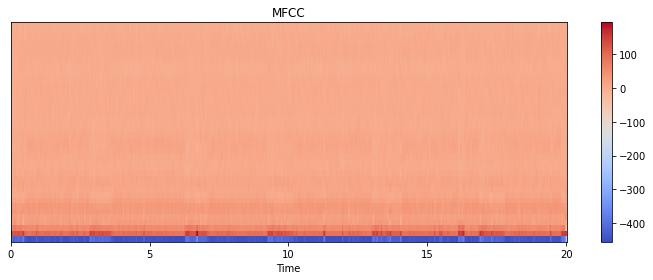

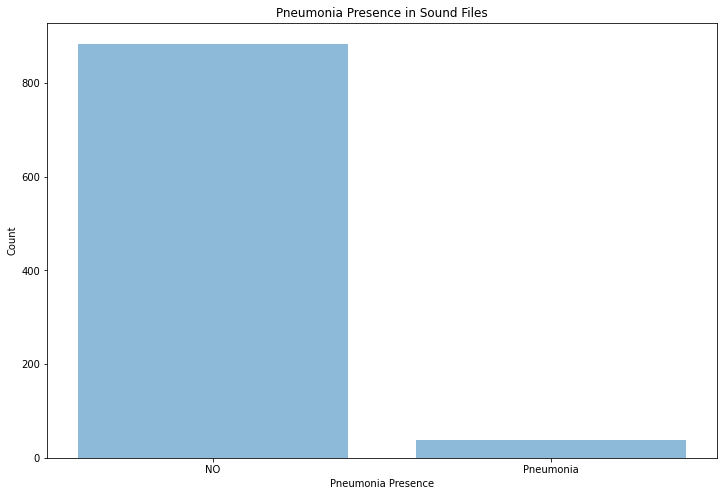

29/29 [==============================] - 17s 577ms/step


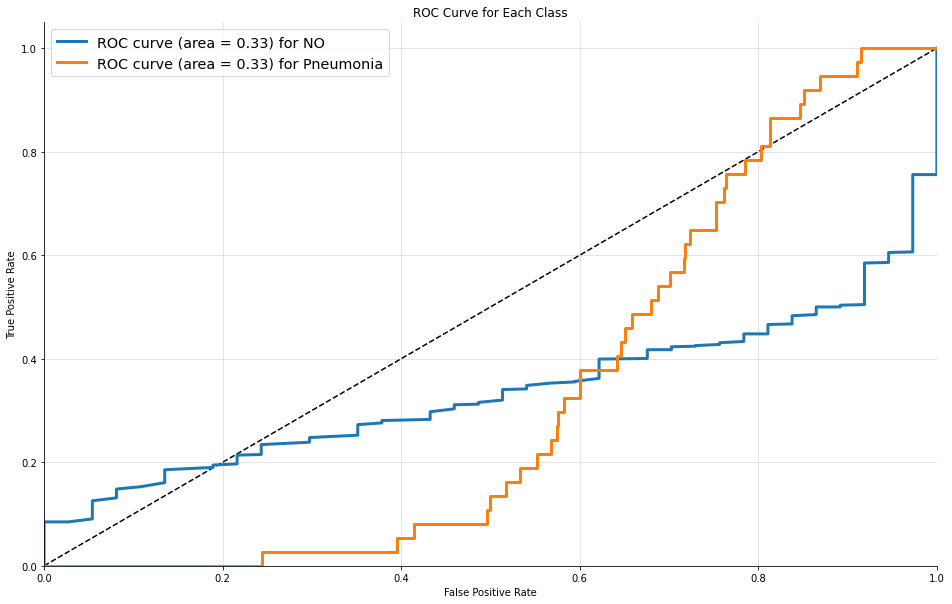

In [ ]:
test_only(model, features, labels, show_mfccs, show_counts, show_roc)

In [ ]:
# for Baghel et al dataset
model = model
data_path = "/content/drive/MyDrive/BIOE 141A/Group Assignments /Winter Quarter /archive/Baghel/audio_files/"
label_path = "/content/drive/MyDrive/BIOE 141A/Group Assignments /Winter Quarter /archive/Baghel/labels.csv"
show_mfccs = True
show_counts = True
show_roc = True

filenames = [f for f in listdir(data_path) if (isfile(join(data_path, f)) and f.endswith('.wav'))]
filepaths = [join(data_path, f) for f in filenames]

# baghel feature extraction
feature_arr = [] 
for file_name in filepaths:
    data = extract_mfccs(file_name)
    feature_arr.append(data)
print('Finished feature extraction from ', len(feature_arr), ' files')
features = np.array(feature_arr)

# baghel label extraction
label_file = pd.read_csv(label_path,header=None) # patient diagnosis file
labels = ([label_file[label_file[0] == x][1].values[0] for x in filenames
           ]) # labels for audio files
label=[]
for i in  labels:
    if i != 'Pneumonia':
        i="NO"
    label.append(i)
labels=np.array(label)
print(labels)


Finished feature extraction from  468  files
['NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'Pneumonia' 'Pneumonia' 'Pneumonia' 'NO' 'NO'
 'NO' 'Pneumonia' 'Pneumonia' 'Pneumonia' 'Pneumonia' 'NO' 'NO'
 'Pneumonia' 'Pneumonia' 'Pneumonia' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'Pneumonia' 'NO' 'NO' 'Pneumonia' 'NO' 'NO' 'NO' 'Pneumonia' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'Pneumonia' 'Pneumonia' 'Pneumonia' 'Pneumonia' 'Pneumonia'
 'Pneumonia' 'Pneumonia' 'Pneumonia' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'

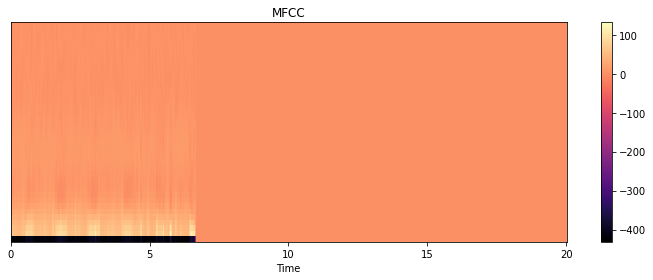

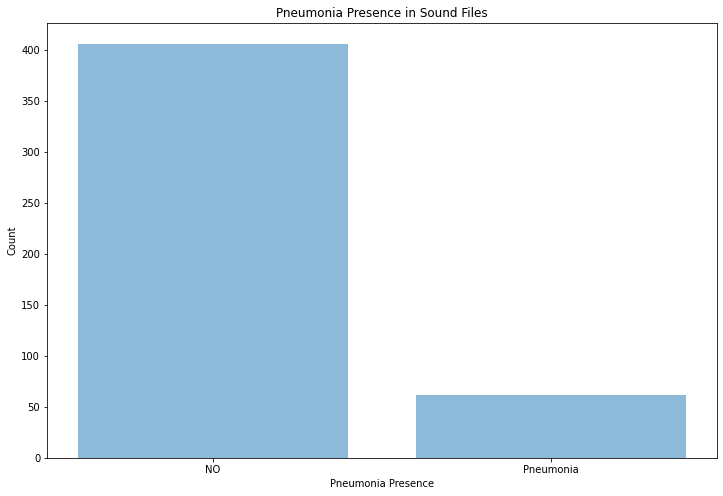

Testing Accuracy:  0.867521345615387
15/15 [==============================] - 3s 197ms/step


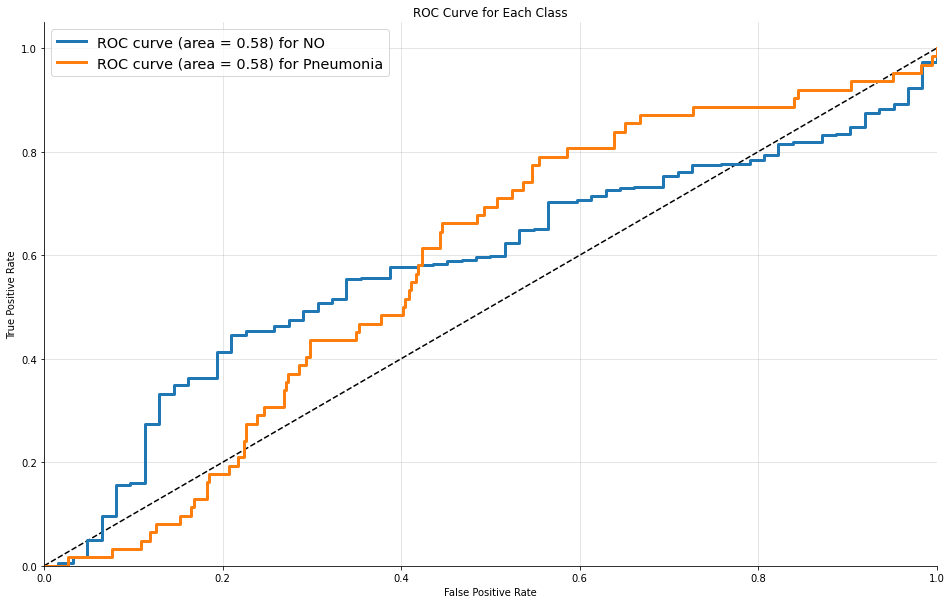

              precision    recall  f1-score   support

No Pneumonia       0.87      1.00      0.93       406
   Pneumonia       0.00      0.00      0.00        62

    accuracy                           0.87       468
   macro avg       0.43      0.50      0.46       468
weighted avg       0.75      0.87      0.81       468

[[406   0]
 [ 62   0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_only(model, features, labels, show_mfccs, show_counts, show_roc)

In [ ]:
# for Fraiwan et al dataset
model = model
data_path = "/content/drive/MyDrive/BIOE 141A/Group Assignments /Winter Quarter /archive/Fraiwan/audio_files/"
label_path = "/content/drive/MyDrive/BIOE 141A/Group Assignments /Winter Quarter /archive/Fraiwan/labels.csv"
show_mfccs = True
show_counts = True
show_roc = True

filenames = [f for f in listdir(data_path) if (isfile(join(data_path, f)) and f.endswith('.wav'))]
filepaths = [join(data_path, f) for f in filenames]

# fraiwan feature extraction
feature_arr = [] 
for file_name in filepaths:
    data = extract_mfccs(file_name)
    feature_arr.append(data)
print('Finished feature extraction from ', len(feature_arr), ' files')
features = np.array(feature_arr)


Finished feature extraction from  336  files


In [ ]:
# fraiwan label extraction
label_file = pd.read_csv(label_path,header=None) # patient diagnosis file
labels = ([label_file[label_file[0] == x][1].values[0] for x in filenames
           ]) # labels for audio files
label=[]
for i in  labels:
    if i != 'Pneumonia':
        i="NO"
    label.append(i)
labels=np.array(label)
print(labels)

['NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'Pneumonia'
 'Pneumonia' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'Pneumonia' 'Pneumonia' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'Pneumonia' 'Pneumonia' 'NO' 'NO' 'NO'
 'Pneumonia' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'Pneumonia' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'Pneumonia' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'Pneumonia' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'Pneumonia' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'Pneumonia' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' '

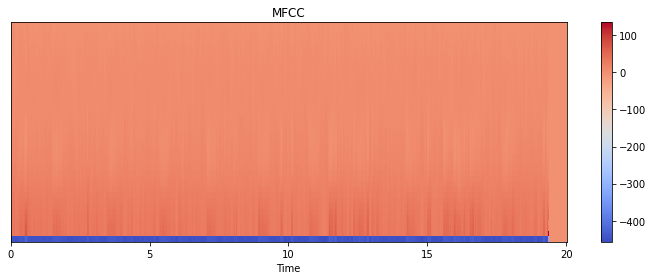

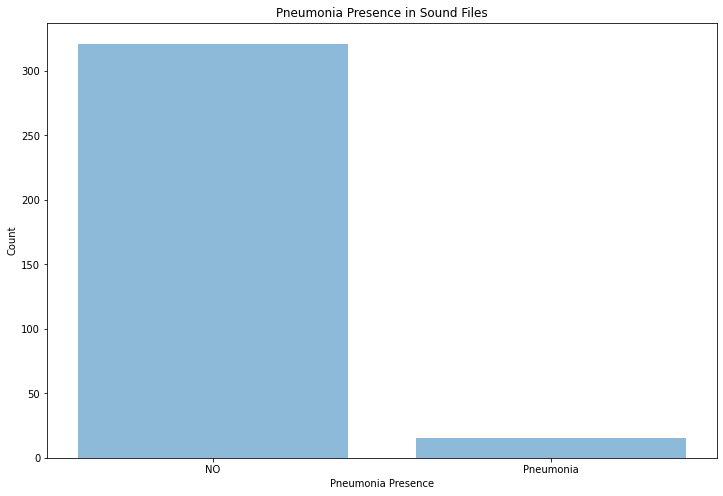

Testing Accuracy:  0.9553571343421936
11/11 [==============================] - 2s 188ms/step


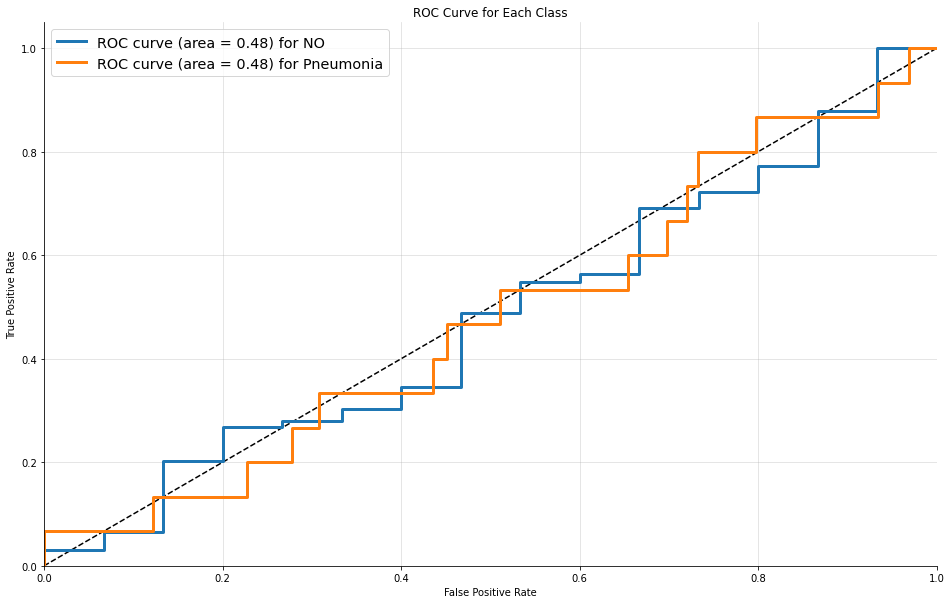

              precision    recall  f1-score   support

No Pneumonia       0.96      1.00      0.98       321
   Pneumonia       0.00      0.00      0.00        15

    accuracy                           0.96       336
   macro avg       0.48      0.50      0.49       336
weighted avg       0.91      0.96      0.93       336

[[321   0]
 [ 15   0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_only(model, features, labels, show_mfccs, show_counts, show_roc)

In [ ]:
# pooled test - label and feature prep block
og_data_path = "/content/drive/MyDrive/BIOE 141A/Group Assignments /Winter Quarter /archive/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/"
og_label_path = "/content/drive/MyDrive/BIOE 141A/Group Assignments /Winter Quarter /archive/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv"
bg_data_path = "/content/drive/MyDrive/BIOE 141A/Group Assignments /Winter Quarter /archive/Baghel/audio_files/"
bg_label_path = "/content/drive/MyDrive/BIOE 141A/Group Assignments /Winter Quarter /archive/Baghel/labels.csv"
fw_data_path = "/content/drive/MyDrive/BIOE 141A/Group Assignments /Winter Quarter /archive/Fraiwan/audio_files/"
fw_label_path = "/content/drive/MyDrive/BIOE 141A/Group Assignments /Winter Quarter /archive/Fraiwan/labels.csv"
show_mfccs = True
show_counts = True
show_roc = True

# original dataset feature and label extraction
og_filenames = [f for f in listdir(og_data_path) if (isfile(join(og_data_path, f)) and f.endswith('.wav'))]
og_filepaths = [join(og_data_path, f) for f in og_filenames]
original_features = extract_features(og_filepaths)
original_labels = extract_labels(og_label_path, og_filenames)
print(len(original_features))
print(len(original_labels))

# for Baghel et al dataset
bg_filenames = [f for f in listdir(bg_data_path) if (isfile(join(bg_data_path, f)) and f.endswith('.wav'))]
bg_filepaths = [join(bg_data_path, f) for f in bg_filenames]

bg_feature_arr = [] 
for bg_file_name in bg_filepaths:
    bg_data = extract_mfccs(bg_file_name)
    bg_feature_arr.append(bg_data)
baghel_features = np.array(bg_feature_arr)

bg_label_file = pd.read_csv(bg_label_path,header=None) # patient diagnosis file
bg_labels = ([bg_label_file[bg_label_file[0] == x][1].values[0] for x in bg_filenames
           ]) # labels for audio files
bg_label=[]
for i in  bg_labels:
    if i != 'Pneumonia':
        i="NO"
    bg_label.append(i)
baghel_labels=np.array(bg_label)
print(len(baghel_features))
print(len(baghel_labels))

# for Fraiwan et al dataset
fw_filenames = [f for f in listdir(fw_data_path) if (isfile(join(fw_data_path, f)) and f.endswith('.wav'))]
fw_filepaths = [join(fw_data_path, f) for f in fw_filenames]

fw_feature_arr = [] 
for fw_file_name in fw_filepaths:
    fw_data = extract_mfccs(fw_file_name)
    fw_feature_arr.append(fw_data)
fraiwan_features = np.array(fw_feature_arr)

fw_label_file = pd.read_csv(fw_label_path,header=None) # patient diagnosis file
fw_labels = ([fw_label_file[fw_label_file[0] == x][1].values[0] for x in fw_filenames
           ]) # labels for audio files
fw_label=[]
for i in  fw_labels:
    if i != 'Pneumonia':
        i="NO"
    fw_label.append(i)
fraiwan_labels=np.array(fw_label)
print(len(fraiwan_features))
print(len(fraiwan_labels))


Finished feature extraction from  921  files
921
921
468
468
336
336


In [ ]:
features = np.concatenate((original_features, baghel_features, fraiwan_features))
labels = np.concatenate((original_labels, baghel_labels, fraiwan_labels))
print(len(features))
print(len(labels))

1725
1725


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 861, 16)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 430, 16)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 430, 16)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 429, 32)       2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 214, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 9, 214, 32)        0

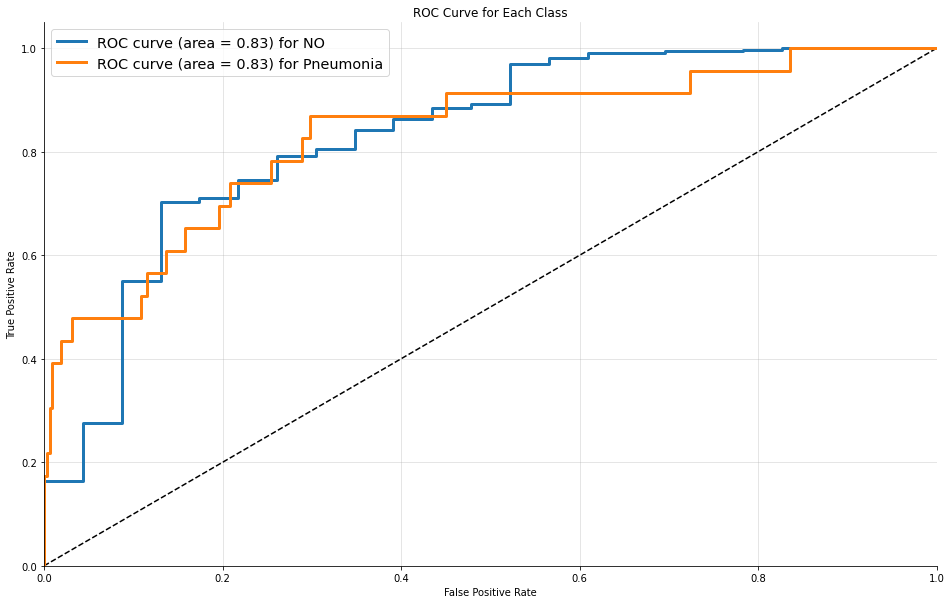

In [ ]:
# train and test block
train_percentage = 0.8

x_train, x_test, y_train, y_test, features, encode_labels = preprocess(features, labels, train_percentage)

model = train_model(x_train, x_test, y_train, y_test, encode_labels)

preds = test_model(x_train, x_test, y_train, y_test, model)

if show_roc == True:
  graph_roc(y_test, preds)

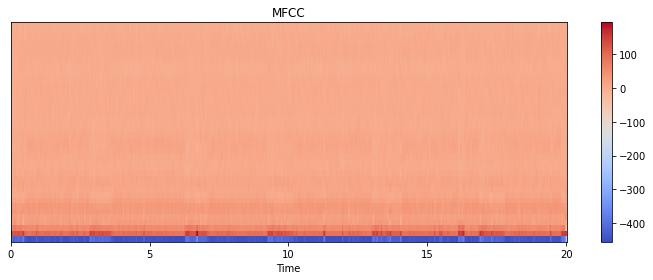

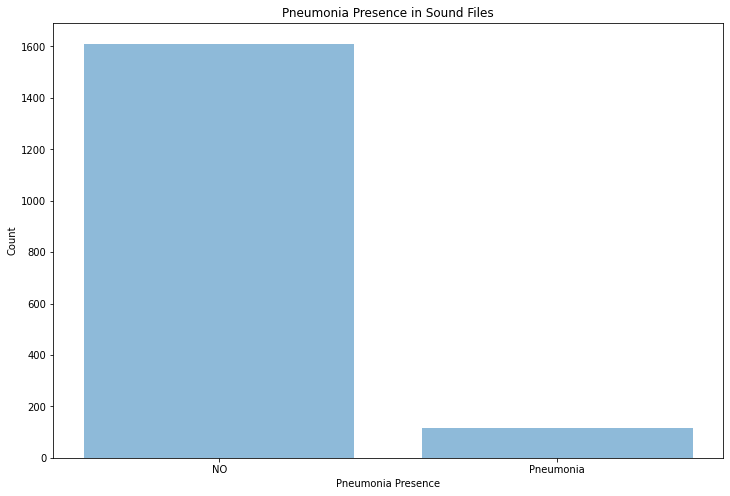

In [ ]:
graph_mfccs(features.squeeze())
graph_counts(labels.squeeze())

###Functions 

The functions below define this program. The main wrapper function, run_analysis, calls on several helper functions to  generate features and labels, train and test the model, and report various analytics.

Each function is comprehensively commented to provide context for the use of each code block.

In [ ]:
def run_analysis(data_path, label_path, train_percentage, show_mfccs, show_counts, show_roc):
  filenames = [f for f in listdir(data_path) if (isfile(join(data_path, f)) and f.endswith('.wav'))]
  filepaths = [join(data_path, f) for f in filenames]

  features = extract_features(filepaths)
  labels = extract_labels(label_path, filenames)

  features = np.delete(features, np.where((labels == 'Asthma') | (labels == 'LRTI'))[0], axis=0) 
  labels = np.delete(labels, np.where((labels == 'Asthma') | (labels == 'LRTI'))[0], axis=0)

  if show_mfccs == True:
    graph_mfccs(features)

  if show_counts == True:
    graph_counts(labels)

  x_train, x_test, y_train, y_test, features, encode_labels = preprocess(features, labels, train_percentage)

  model = train_model(x_train, x_test, y_train, y_test, encode_labels)

  preds = test_model(x_train, x_test, y_train, y_test, model)

  if show_roc == True:
    graph_roc(y_test, preds)

  return model

In [ ]:
# test only
def test_only(model, features, labels, show_mfccs, show_counts, show_roc):

  if show_mfccs == True:
    graph_mfccs(features)

  if show_counts == True:
    graph_counts(labels)

  le = LabelEncoder()
  i_labels = le.fit_transform(labels)
  encode_labels = to_categorical(i_labels)

  features = np.reshape(features, (*features.shape, 1))

  score = model.evaluate(features, encode_labels, verbose=0)

  print("Testing Accuracy: ", score[1])

  preds = model.predict(features)

  if show_roc == True:
    graph_roc(encode_labels, preds)

  #implement "preds" block
  classpreds = np.argmax(preds, axis=1) # predicted classes 

  y_testclass = np.argmax(encode_labels, axis=1) # true classes

  print(classification_report(y_testclass, classpreds, \
                              target_names=["No Pneumonia", "Pneumonia"]))
  print(confusion_matrix(y_testclass, classpreds))


In [ ]:
def extract_features(filepaths):
  features = [] 

  # Iterate through each sound file and extract the features
  for file_name in filepaths:
      data = extract_mfccs(file_name)
      features.append(data)

  features = np.array(features)

  
  print('Finished feature extraction from ', len(features), ' files')
  return features

In [ ]:
def extract_mfccs(file_name):
    """
    This function takes in the path for an audio file as a string, loads it, and returns the MFCC
    of the audio"""
    
    max_pad_len = 862 # to make the length of all MFCC equal

    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast', duration=20) 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

In [ ]:
def extract_labels(label_path, filenames):
  p_id_in_file = [] # patient IDs corresponding to each file
  for name in filenames:
      p_id_in_file.append(int(name[:3]))

  p_id_in_file = np.array(p_id_in_file) 
  #To be completed, need to look how incoming data is labeled
  p_diag = pd.read_csv(label_path,header=None) # patient diagnosis file
  labels = ([p_diag[p_diag[0] == x][1].values[0] for x in p_id_in_file]) # labels for audio files
  label=[]
  for i in  labels:
      if i != 'Pneumonia':
          i="NO"
      label.append(i)
  labels=np.array(label)
  
  return labels

In [ ]:
def graph_mfccs(features):
  plt.figure(figsize=(10, 4))
  librosa.display.specshow(features[0], x_axis='time')
  plt.colorbar()
  plt.title('MFCC')
  plt.tight_layout()
  plt.show()

In [ ]:
def graph_counts(labels):
  unique_elements, counts_elements = np.unique(labels, return_counts=True)
  y_pos = np.arange(len(unique_elements))
  plt.figure(figsize=(12,8))
  plt.bar(unique_elements, counts_elements, align='center', alpha=0.5)
  plt.xticks(y_pos, unique_elements)
  plt.ylabel('Count')
  plt.xlabel('Pneumonia Presence')
  plt.title('Pneumonia Presence in Sound Files')
  plt.show()

In [ ]:
def preprocess(features, labels, train_percentage):
  le = LabelEncoder()
  i_labels = le.fit_transform(labels)
  encode_labels = to_categorical(i_labels)

  features = np.reshape(features, (*features.shape, 1))

  #train-test split
  x_train, x_test, y_train, y_test = \
  train_test_split(features, encode_labels, stratify=encode_labels, test_size=1-train_percentage, \
                   random_state = 42) 
  
  return x_train, x_test, y_train, y_test, features, encode_labels

In [ ]:
def train_model(x_train, x_test, y_train, y_test, encode_labels):
  num_rows = 40
  num_columns = 862
  num_channels = 1
  num_labels = encode_labels.shape[1] #changed from oh_labels to just labels
  filter_size = 2
  model = construct_model(num_rows, num_columns, num_channels, num_labels, filter_size)

  # optim = Adam(learning_rate=0.005)

  # Compile the model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

  # Display model architecture summary 
  model.summary()

  # Calculate pre-training accuracy 
  score = model.evaluate(x_test, y_test, verbose=1)
  accuracy = 100*score[1]
  print("Pre-training accuracy: %.4f%%" % accuracy) 
    
  # Train model
  num_epochs = 100

  num_batch_size = 128

  callbacks = [
      ModelCheckpoint(
          filepath='mymodel2_{epoch:02d}.h5',
          # Path where to save the model
          # The two parameters below mean that we will overwrite
          # the current checkpoint if and only if
          # the `val_accuracy` score has improved.
          save_best_only=True,
          monitor='val_accuracy',
          verbose=1)
  ]
  start = datetime.now()
  model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs,
            validation_data=(x_test, y_test), callbacks=callbacks, verbose=1)
  duration = datetime.now() - start
  print("Training completed in time: ", duration)

  return model
  

In [ ]:
def construct_model(num_rows, num_columns, num_channels, num_labels, filter_size):
  # Construct model 
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=filter_size,
                  input_shape=(num_rows, num_columns, num_channels), activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=32, kernel_size=filter_size, activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=64, kernel_size=filter_size, activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=128, kernel_size=filter_size, activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(GlobalAveragePooling2D())

  model.add(Dense(2, activation='softmax')) 
  return model

In [ ]:
def test_model(x_train, x_test, y_train, y_test, model):
  train_score = model.evaluate(x_train, y_train, verbose = 0)
  print("Training Accuracy: ", train_score[1])

  test_score = model.evaluate(x_test, y_test, verbose=0)
  print("Testing Accuracy: ", test_score[1])

  #implement "preds" block
  preds = model.predict(x_test) # label scores 

  classpreds = np.argmax(preds, axis=1) # predicted classes 

  y_testclass = np.argmax(y_test, axis=1) # true classes

  print(classification_report(y_testclass, classpreds, \
                              target_names=["No Pneumonia", "Pneumonia"]))
  print(confusion_matrix(y_testclass, classpreds))

  return preds

In [ ]:
def graph_roc(y_test, preds):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(2):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], preds[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  fig, ax = plt.subplots(figsize=(16, 10))
  ax.plot([0, 1], [0, 1], 'k--')
  ax.set_xlim([0.0, 1.0])
  ax.set_ylim([0.0, 1.05])
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title('ROC Curve for Each Class')
  c_names = ["NO", 'Pneumonia']
  for i in range(2):
      ax.plot(fpr[i], tpr[i], linewidth=3, label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], c_names[i]))
  ax.legend(loc="best", fontsize='x-large')
  ax.grid(alpha=.4)
  sns.despine()
  plt.show()